# The Office Analytics Project

## Cleaning the data:
    our original dataset contains a lot of information we don't need, like the scene and text of each line
    

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

officeScripts = pd.read_csv('eclipse-workspace/TheOffice/the-office-scripts.csv')

officeScripts.drop(['line_text','scene','id'],axis='columns',inplace=True) #remove unnecessary columns
officeScripts = officeScripts[officeScripts.deleted != True] #remove deleted scenes
officeScripts.head()

,season,episode,speaker,deleted
0,1,1,Michael,False
1,1,1,Jim,False
2,1,1,Michael,False
3,1,1,Jim,False
4,1,1,Michael,False


# Creating the Graph:
## Step 1: Create a dictionary
    keys = names
    values = number of lines
## Step 2: Create a DataFrame object
    row = line number
    columns = characters
## Step 3: Loop through our prepared data
    each loop is a line
    if the person speaking is one of our characters, add +1 to that person's dictionary value
    update every person's total number of lines up to this point
## Step 4: Plot the graph
    after looping through every line, simply plot our DataFrame object!

Text(0.5,1,'Number of Lines in Season 1 of The Office by character')

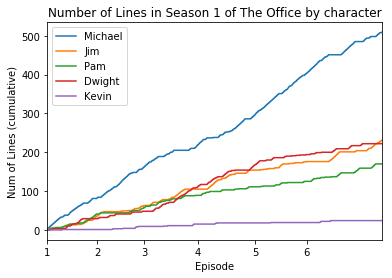

In [28]:
S_One = officeScripts[officeScripts.season == 1] #only S1
Speaker = S_One.loc[:,'speaker'] #this is our prepared data, it only contains the line number (index) and who is speaking 
dict1 = {'Michael':0,'Jim':0,'Pam':0,'Dwight':0,'Kevin':0}
df = pd.DataFrame(np.zeros(shape=(len(Speaker),len(dict1.keys()))), columns=dict1.keys())

episode = 0;
episode_lines = []
i = 0
for ind, row in S_One.iterrows():
    if row[1] - episode == 1:
        episode_lines.append(i)
        episode = episode + 1
    i = i+1
 
    

for i,name in enumerate(Speaker):
    if name in dict1.keys():
        dict1[name] = dict1.get(name)+1;
    for k in dict1.keys():
        df[k][i] = dict1.get(k)


#plot the graph
ax = df.plot()
ax.set_xticks(episode_lines)
ax.set_xticklabels(range(1,len(episode_lines)+1))
ax.set_xlabel('Episode')
ax.set_ylabel('Num of Lines (cumulative)')
ax.set_title('Number of Lines in Season 1 of The Office by character')

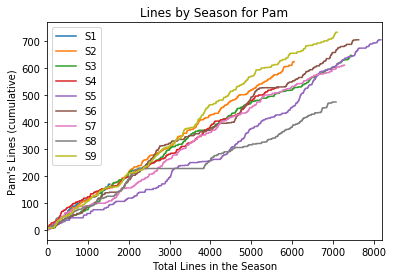

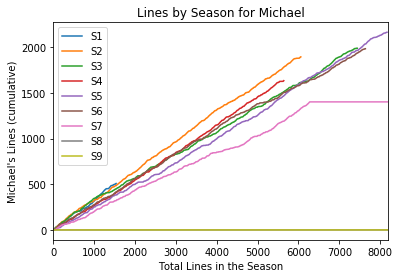

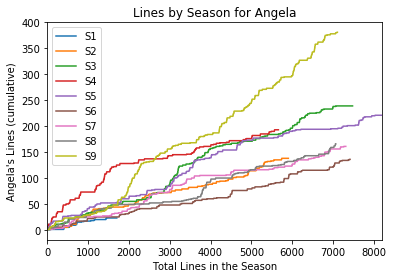

In [29]:
def my_func(name):
    Speaker2 = officeScripts.loc[:,['speaker','season']] #only need the person speaking and season 
    linesBySeason = np.zeros(9)
    df2 = pd.DataFrame(np.zeros(shape=(8200,9)) )
    season = 1;
    lineNum = 0;
    for ind, row in Speaker2.iterrows():
        if row[0] == name:
            seas = row[1]
            if seas - season == 1:
                df2[season-1][lineNum:] = np.nan
                lineNum = 0
                season = season + 1  
            linesBySeason[season-1] = linesBySeason[season-1]+1      
        lineNum = lineNum+1
        df2[season-1][lineNum] = linesBySeason[season-1]
    df2[8][lineNum:] = np.nan
    
    df2.columns = ['S1','S2','S3','S4','S5','S6','S7','S8','S9']
    ax2 = df2.plot()
    ax2.set_xlabel('Total Lines in the Season')
    ax2.set_ylabel(name + '\'s Lines (cumulative)')
    ax2.set_title('Lines by Season for ' + name)
    

my_func('Pam')
my_func('Michael')
my_func('Angela')
